# Naive Bayes hardcoded

In this notebook, we are going to hardcode the naive bayes classifier (no use of libraries like scikit-learn and such).

## imports + configurations

In here, we are going to import our dependencies.

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import logging
import random

We now configure the logger.

In [6]:
# we define our log repository
LOG_REPOSITORY = "./logs/"

# and we configure our logger
logging.basicConfig(filename = LOG_REPOSITORY + 'naive-bayes-hardcoded.log', 
                    format='%(asctime)s [%(levelname)s]: %(message)s', 
                    level=logging.DEBUG)

In here, we import our data.<br>
The dataset represents a bunch of sms labeled as _Spam_ or _Ham_.<br>
I got the data from kaggle: __[SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset/home)__.

In [3]:
# import data from csv file using pandas
data = pd.read_csv("datasets/sms-spam-collection-dataset/spam.csv", encoding='latin-1', delimiter=',', low_memory=False)

# shuffle the data
data = data.sample(frac=1)

#print the 10 first lines of data
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2603,ham,\Im at arestaurant eating squid! i will be out...,NaN,NaN,NaN
5282,ham,I have gone into get info bt dont know what to do,NaN,NaN,NaN
1538,ham,Midnight at the earliest,NaN,NaN,NaN
4967,ham,Future is not what we planned for tomorrow.......,NaN,NaN,NaN
4285,ham,Congrats. That's great. I wanted to tell you n...,NaN,NaN,NaN
3798,ham,"Actually nvm, got hella cash, we still on for ...",NaN,NaN,NaN
3800,ham,"It's ok, at least armand's still around",NaN,NaN,NaN
4724,ham,There'll be a minor shindig at my place later ...,NaN,NaN,NaN
4084,spam,Orange brings you ringtones from all time Char...,NaN,NaN,NaN
2191,ham,Thankyou so much for the call. I appreciate yo...,NaN,NaN,NaN


In here we rename the __v1__ and __v2__ columns as __label__ and __text__ respectively.

In [16]:
# renaming columns
data = data.rename(columns = {'v1':'label','v2':'text'})

# print a description of the data
data.describe()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Now we create a bar plot to see the difference in numbers between spam and ham sms.

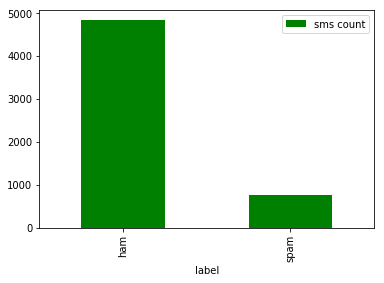

In [21]:
data[['label','text']].groupby(['label']).count().rename(columns={'text':'sms count'}).plot(kind='bar', color='g')

We can clearly see that the ham sms numbers are greater than the spam ones.<br>
So we remove a random selected values with the label _ham_ so that we don't get false positive classification because of an unbalanced dataset.

all = 5572, ham = 4825, spam = 747
ham to remove = 4078


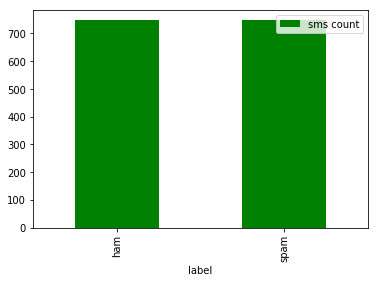

In [70]:
print("all = {}, ham = {}, spam = {}".format(len(data),len(data[data['label']=='ham']),len(data[data['label']=='spam'])))

# number of ham values to remove from the dataset
ham_remove_n = len(data[data['label']=='ham']) - len(data[data['label']=='spam'])

print("ham to remove = {}".format(ham_remove_n))

# drop the exsess
balanced_data = data.drop(random.sample(list(data[data['label']=='ham'].index),ham_remove_n))

# reprint the bar plot
balanced_data[['label','text']].groupby(['label']).count().rename(columns={'text':'sms count'}).plot(kind='bar', color='g')